## clean dogs data
- remove black images
- make a train, val division 70, 30
- plot to see distribution of data

In [1]:
import os

INPUT_FOLDER = "data/dogs/train"
dog_breeds = [f for f in os.listdir(INPUT_FOLDER)]
print(len(dog_breeds))

images = {}
for b in dog_breeds:
    images[b] = [os.path.join(INPUT_FOLDER, b, f) for f in os.listdir(os.path.join(INPUT_FOLDER, b))]

100


In [2]:
%matplotlib inline


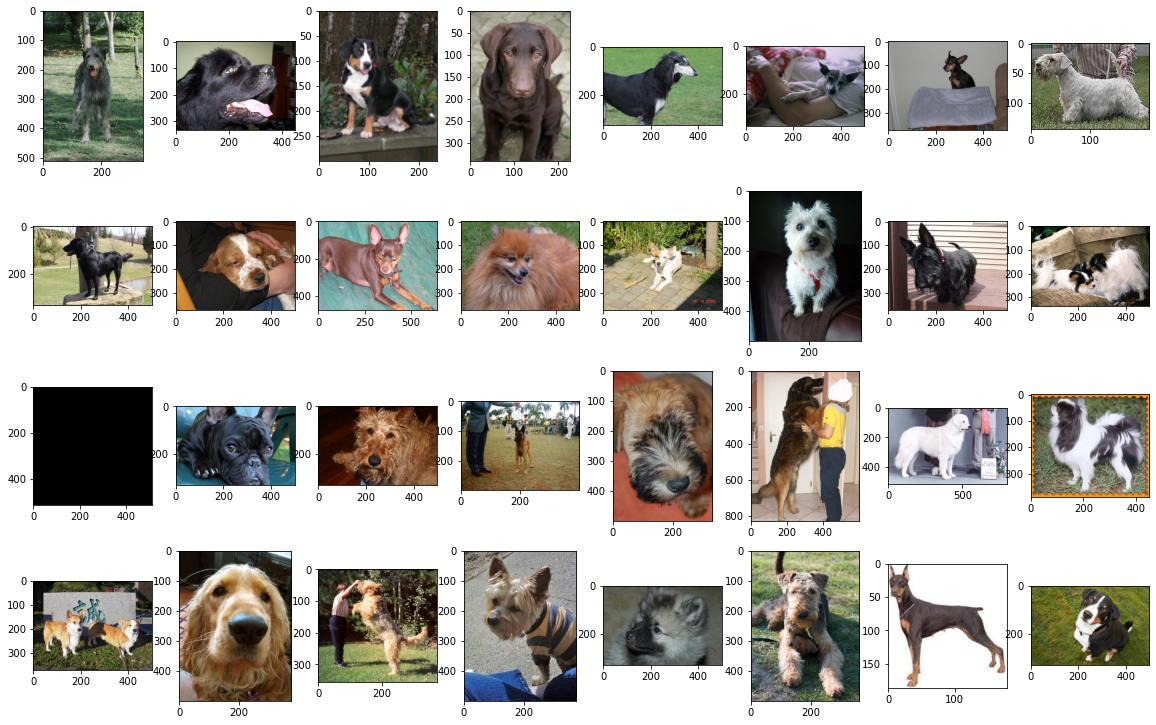

In [5]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import random
import cv2

# this function will be a life saver
def plot_image_mosaic(images, labels = None, n_columns = 8):
    fig = plt.figure(figsize=(20,16))
    fig.tight_layout()

    #fig.subplots_adjust(bottom=4) # or whatever

    for i, image in enumerate(images):
        ax = plt.subplot(int(len(images) / n_columns + 1), n_columns, i + 1)
        if labels is not None:
            ax.title.set_text(labels[i])
        if image.shape[2] == 1:
            plt.imshow(image, cmap="gray")
        else:
            plt.imshow(image)

def plot_random_images(images):
    rand_breeds = random.sample(list(images.keys()), 32)
    r_images = []
    for r in rand_breeds:
        img_path = os.path.join(random.choice(images[r]))
        I = cv2.imread(img_path)
        I = I[:,:,::-1]
        if I is not None:
            r_images.append(I)
                         
    plot_image_mosaic(r_images)
                                
plot_random_images(images)

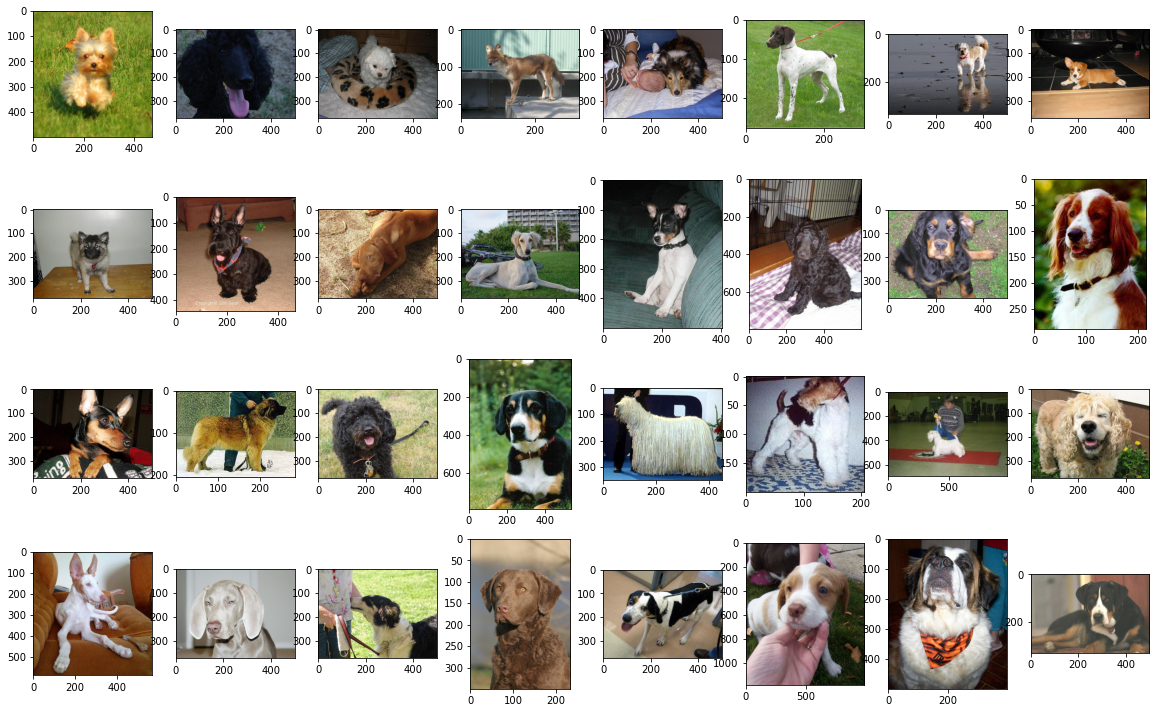

In [6]:
import numpy as np

for b in images.keys():
    del_images = []
    for i,p in enumerate(images[b]):
        I = cv2.imread(p)
        if np.mean(I) < 1:
            del_images.append(i)
            
    for idx in sorted(del_images, reverse=True):
        del images[b][idx] # since I'm doing in reverse, it would not mess up the order
    
plot_random_images(images)

### black images are gone, lets see the distribution using pandas

In [7]:
import pandas as pd

d = [[breed, len(images[b])] for breed in images.keys()]
df = pd.DataFrame(d, columns=["breed", "n_images"])

df.head(n=3)

,breed,n_images
0,n02095570-Lakeland_terrier,195
1,n02102177-Welsh_springer_spaniel,195
2,n02091032-Italian_greyhound,195


In [8]:
df["n_images"].value_counts()

195    100
Name: n_images, dtype: int64

In [14]:
# create a new plot
#s1 = figure(title="Spoof distribution")
#h, e = np.histogram(df_spoof["oz_score"], density=False, bins=20)
#s1.quad(top=h, bottom=0, left=e[:-1], right=e[1:],
#       fill_color="orange", line_color="white", alpha=0.7)

### export as train, val, test and inside the folders of all breeds

In [10]:
import shutil
import os

OUT_FOLDER = "data/dogbreeds_clean/"

splits = ["train", "val", "test"]
for s in splits:
    folder_path = os.path.join(OUT_FOLDER, s)
    if not os.path.isdir(folder_path):
        os.mkdir(folder_path)
        
for b,breed_images in images.items():
    these_images = {}
    these_images["train"], these_images["val"], these_images["test"] = np.split(breed_images, [int(len(breed_images)*0.7), int(len(breed_images)*0.85)])
    for s in splits:
        folder_path = os.path.join(OUT_FOLDER, s, b)
        if not os.path.isdir(folder_path):
            os.mkdir(folder_path)
        for img_ori_path in these_images[s]:
            #print(f"{img_ori_path} {os.path.join(folder_path, os.path.basename(img_ori_path))}")
            shutil.copyfile(img_ori_path, os.path.join(folder_path, os.path.basename(img_ori_path)))
            
print("Done")

Done


### (bonus) create a long-tailed version of the dataset